In [1]:
import pandas as pd
fixedData = pd.read_csv('Cleaned-Data.csv')

In [2]:
relevant_data = fixedData[['text','Label']]

In [3]:
import numpy as np
train_indices = np.random.rand(len(relevant_data)) < 0.8
train = relevant_data[train_indices].reset_index(drop=True)
test = relevant_data[~train_indices].reset_index(drop=True)
test_indices = np.random.rand(len(test)) < 0.7
val = test[~test_indices].reset_index(drop=True)
test = test[test_indices].reset_index(drop=True)
print(train.head())
print(len(train))
print(test.head())
print(len(test))
print(val.head())
print(len(val))

                                                text  Label
0  ['as', 'us', 'budget', 'fight', 'looms', 'repu...      0
1  ['us', 'military', 'to', 'accept', 'transgende...      0
2  ['senior', 'us', 'republican', 'senator', 'let...      0
3  ['fbi', 'russia', 'probe', 'helped', 'by', 'au...      0
4  ['trump', 'wants', 'postal', 'service', 'to', ...      0
36030
                                                text  Label
0  ['alabama', 'official', 'to', 'certify', 'sena...      0
1  ['factbox', 'trump', 'on', 'twitter', 'dec', '...      0
2  ['us', 'appeals', 'court', 'rejects', 'challen...      0
3  ['federal', 'judge', 'partially', 'lifts', 'tr...      0
4  ['failed', 'vote', 'to', 'oust', 'president', ...      0
6233
                                                text  Label
0  ['spy', 'chiefs', 'pressure', 'congress', 'to'...      0
1  ['house', 'gives', 'final', 'approval', 'to', ...      0
2  ['us', 'responds', 'in', 'court', 'fight', 'ov...      0
3  ['vote', 'in', 'senate', '

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
training_text = []
training_result = []
for i in range(len(train)): #len(train)
    training_text.append(''.join(str(x) for x in train['text'][i]))
    training_result.append(train['Label'][i])
training_text = v.fit_transform(training_text)

In [5]:
text = []
result = []
for i in range(len(train)):
    text.append(''.join(str(x) for x in train['text'][i]))
    result.append(train['Label'][i])
X_train = v.transform(text)
y_train = np.asarray(result)

text = []
result = []
for i in range(len(val)):
    text.append(''.join(str(x) for x in val['text'][i]))
    result.append(val['Label'][i])
X_val = v.transform(text)
y_val = np.asarray(result)

text = []
result = []
for i in range(len(test)):
    text.append(''.join(str(x) for x in test['text'][i]))
    result.append(test['Label'][i])
X_test = v.transform(text)
y_test = np.asarray(result)

In [8]:
import tensorflow as tf
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import layers
input_dim = X_train.shape[1]
im_input = layers.Input(shape=(input_dim,))
x = layers.Dense(units=10, activation='relu')(im_input)
x = layers.Dense(units=1, activation='sigmoid')(x)
model = Model(inputs=im_input, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 195031)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1950320   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,950,331
Trainable params: 1,950,331
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val), batch_size=100)
loss, accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test)
print("Testing Accuracy: {:.4f}".format(accuracy))

Train on 36030 samples, validate on 2635 samples
Epoch 1/3
36030/36030 [==============================] - 138s 4ms/step - loss: 0.0952 - acc: 0.9788 - val_loss: 0.0304 - val_acc: 0.9954
Epoch 2/3
36030/36030 [==============================] - 133s 4ms/step - loss: 0.0142 - acc: 0.9989 - val_loss: 0.0189 - val_acc: 0.9962
Epoch 3/3
36030/36030 [==============================] - 99s 3ms/step
Training Accuracy: 0.9999
6233/6233 [==============================] - 16s 3ms/step
Testing Accuracy: 0.9966


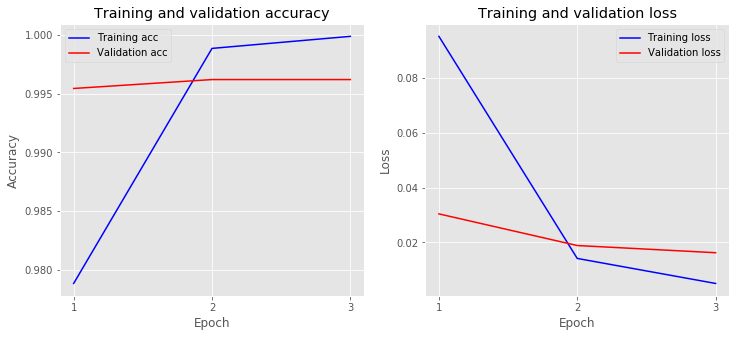

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.xticks([1,2,3])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.xticks([1,2,3])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
plot_history(history)

In [10]:
print(training_text.shape)

(35895, 195075)


In [11]:
print(training_text)

  (0, 193543)	1
  (0, 144669)	1
  (0, 54569)	1
  (0, 57033)	1
  (0, 23858)	1
  (0, 189912)	1
  (0, 146502)	1
  (0, 137683)	1
  (0, 170712)	1
  (0, 79173)	1
  (0, 3063)	1
  (0, 17881)	2
  (0, 7150)	1
  (0, 3923)	3
  (0, 51494)	1
  (0, 152827)	1
  (0, 146476)	1
  (0, 67052)	1
  (0, 60211)	2
  (0, 152258)	1
  (0, 189368)	1
  (0, 86901)	1
  (0, 155162)	1
  (0, 165013)	1
  (0, 188060)	1
  :	:
  (35894, 15280)	8
  (35894, 96658)	1
  (35894, 178146)	1
  (35894, 189957)	3
  (35894, 62688)	2
  (35894, 172144)	4
  (35894, 189187)	3
  (35894, 46443)	1
  (35894, 9869)	4
  (35894, 189237)	3
  (35894, 190595)	6
  (35894, 7305)	24
  (35894, 118651)	11
  (35894, 23935)	1
  (35894, 174464)	31
  (35894, 60835)	8
  (35894, 172499)	8
  (35894, 189528)	2
  (35894, 81325)	15
  (35894, 117530)	14
  (35894, 171160)	56
  (35894, 186891)	1
  (35894, 171287)	1
  (35894, 182426)	13
  (35894, 10706)	7
